課題内容
1. 自分が取り組む通し課題を1つ選択する
    * Kaggleアカウントを作成し、該当課題のデータをダウンロードする
2. 目的変数と説明変数の関係を確認するためのグラフを作成する（ここからはNotebook上の作業です）
3. 目的変数を説明するのに有効そうな説明変数を見つける
4. DAY1で学んだアルゴリズムを利用する
    * 回帰の場合は線形回帰、分類の場合はロジスティック回帰
    * 質的変数が扱えないアルゴリズムを使う場合は、ダミー変数に置き換える
5. 予測精度または識別精度を確認する
    * 回帰問題の場合は、MSE、RMSE、MAEを求める
    * 分類問題の場合は、混同行列を作成し、Accuracy、Recall、Precisionを求める
6. できたところまでをNotebookでまとめ、GithubまたはGistで公開する
    * 公開方法がわからない方は、ipynbファイルを所属チャンネルに貼る

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics

In [2]:
def output_prediction(data, target):
    clf = linear_model.LinearRegression()
    clf.fit(data, target)
    target_predict = clf.predict(data)
    
    accuracy = calculate_accuracy(data, target)
    
    print(accuracy)

    target_predict = clf.predict(data)
    
    plt.plot(target, target, label="answer")
    plt.plot(np.sort(target), np.sort(target_predict), label="predict")
    plt.legend()
    plt.show()

In [3]:
def calculate_accuracy(data, target):
    clf = linear_model.LinearRegression()
    clf.fit(data, target)
    target_predict = clf.predict(data)
    # 平均二乗誤差 (MSE)
    mse = metrics.mean_squared_error(target, target_predict)
    # 二乗平均平方根誤差 (RMSE)
    rmse = np.sqrt(metrics.mean_squared_error(target, target_predict))
    # 平均絶対誤差 (MAE)
    mae = metrics.mean_absolute_error(target, target_predict)
    
    return {"MSE":mse, "RMSE":rmse, "MAE":mae}
    

In [4]:
df = pd.read_csv("./data/measurements.csv", decimal=',')

In [5]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


C:\Users\N398\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\N398\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


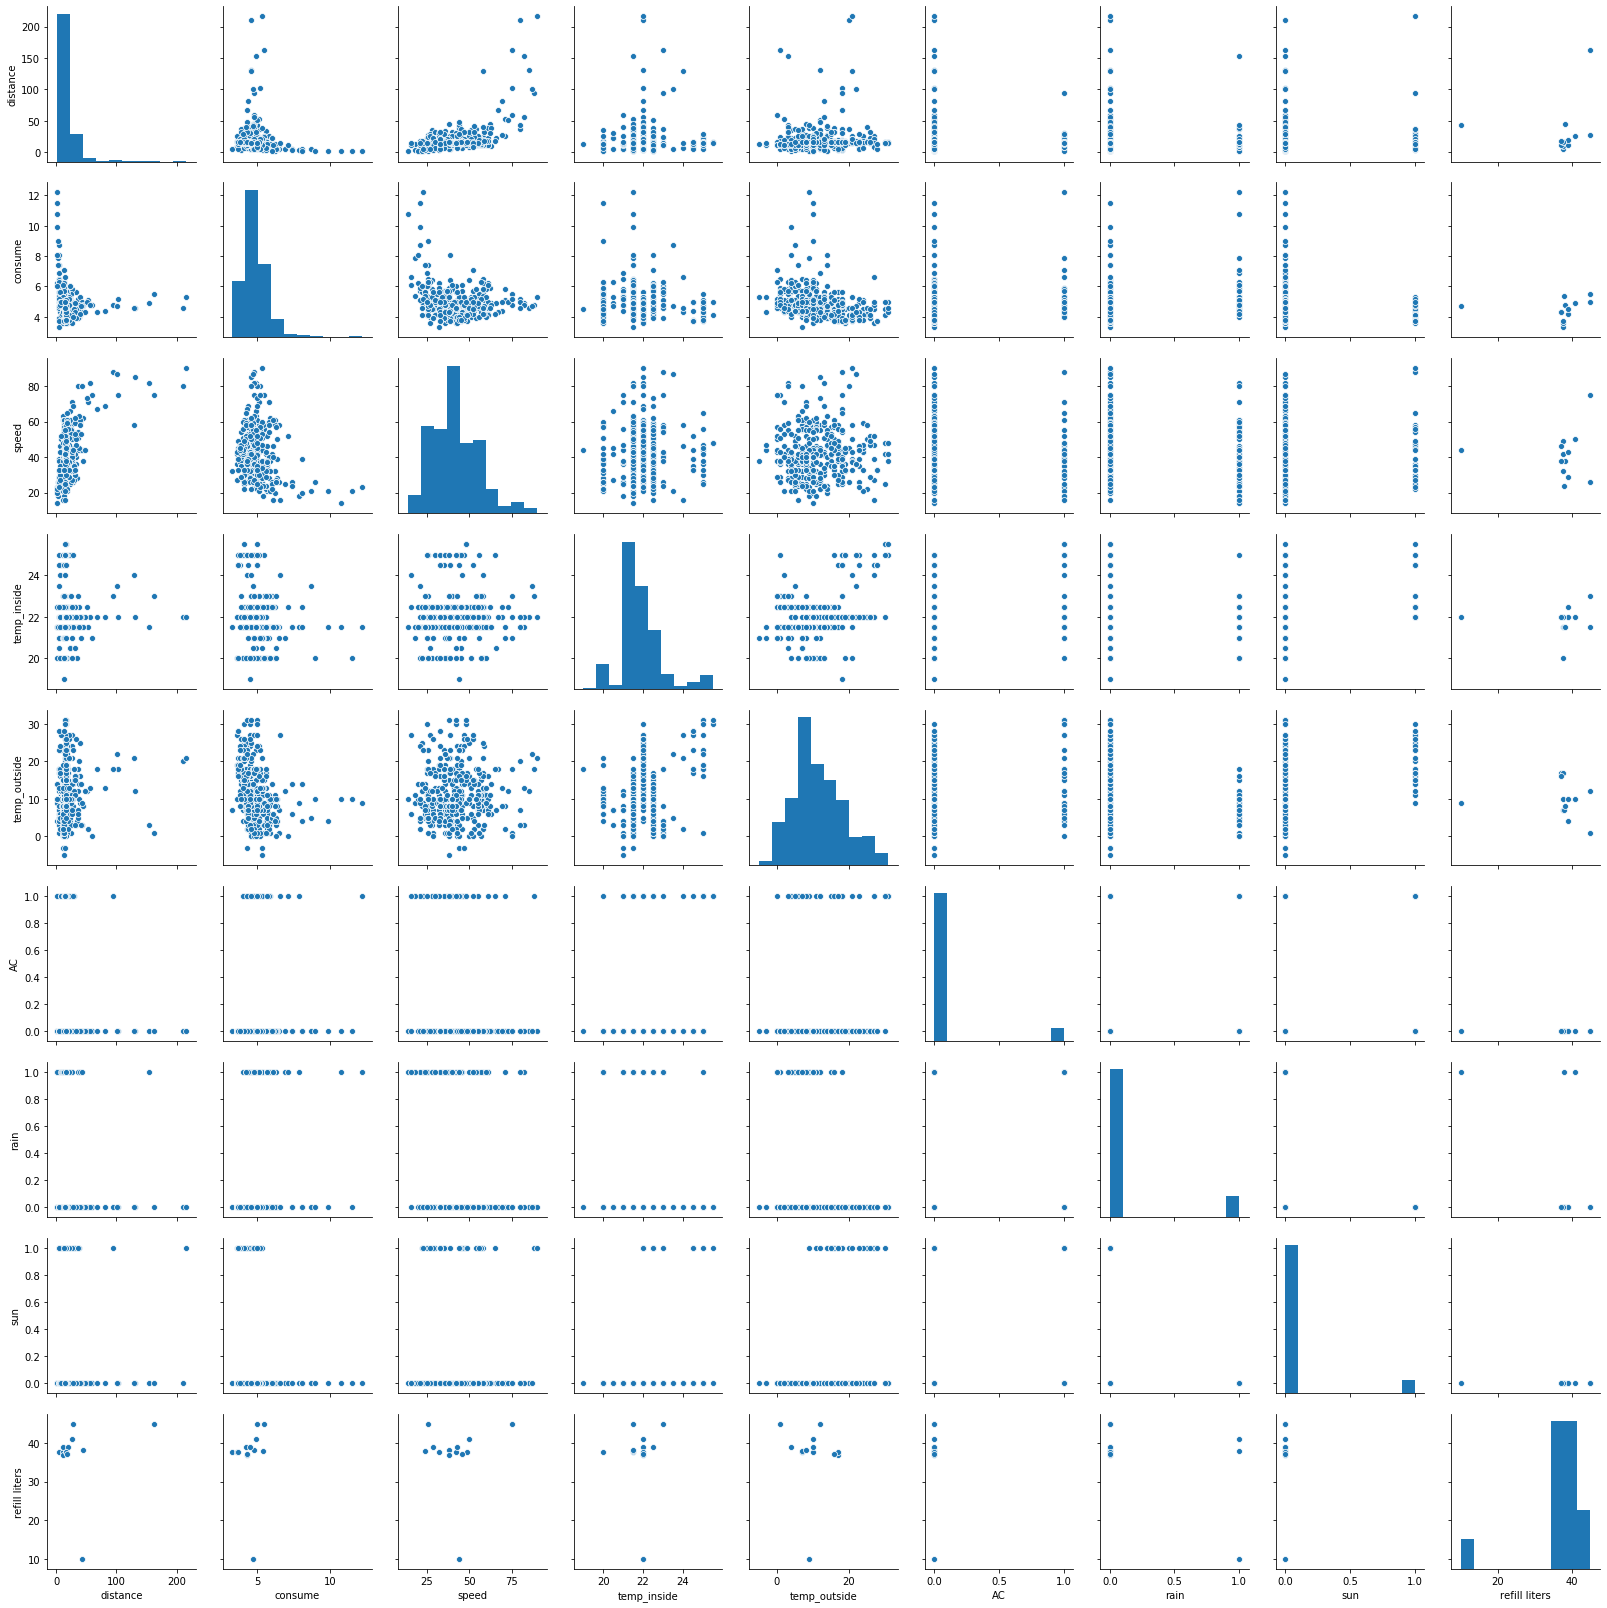

In [11]:
# 散布図行列
sns.pairplot(df)

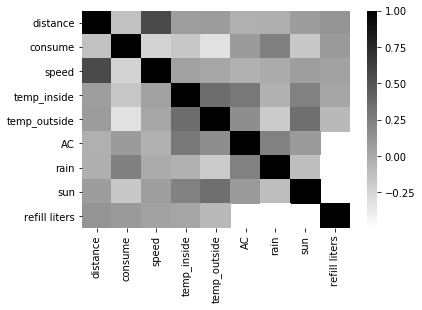

In [12]:
# 相関行列
sns.heatmap(pd.DataFrame.corr(df), cmap='binary')

In [8]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [9]:
df = df.dropna(subset=['temp_inside'])
target = df['consume']
data = df.loc[:, ['distance', "speed", 'temp_inside' , 'temp_outside', 'AC', 'rain', 'sun']]

{'MSE': 0.8578502667440342, 'RMSE': 0.9262020658279888, 'MAE': 0.6216458191043263}


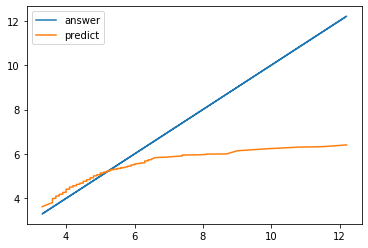

In [10]:
output_prediction(data, target)